In [21]:
!pip install fredapi 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from fredapi import Fred

fred_key = 'ad7128b29b583822569ec052671a25ca'


In [23]:
fred = Fred(api_key=fred_key)

In [24]:
fred

In [25]:
# Search for economic data

sp_search = fred.search('S&P',order_by='popularity')
sp_search.head()
print ('Done')

Done


In [26]:
sp_search.shape

(1000, 15)

In [27]:
# Pull raw data
sp500 = fred.get_series(series_id='SP500')
sp500

2013-08-26    1656.78
2013-08-27    1630.48
2013-08-28    1634.96
2013-08-29    1638.17
2013-08-30    1632.97
               ...   
2023-08-21    4399.77
2023-08-22    4387.55
2023-08-23    4436.01
2023-08-24    4376.31
2023-08-25    4405.71
Length: 2610, dtype: float64

<Axes: title={'center': 'S&P500'}>

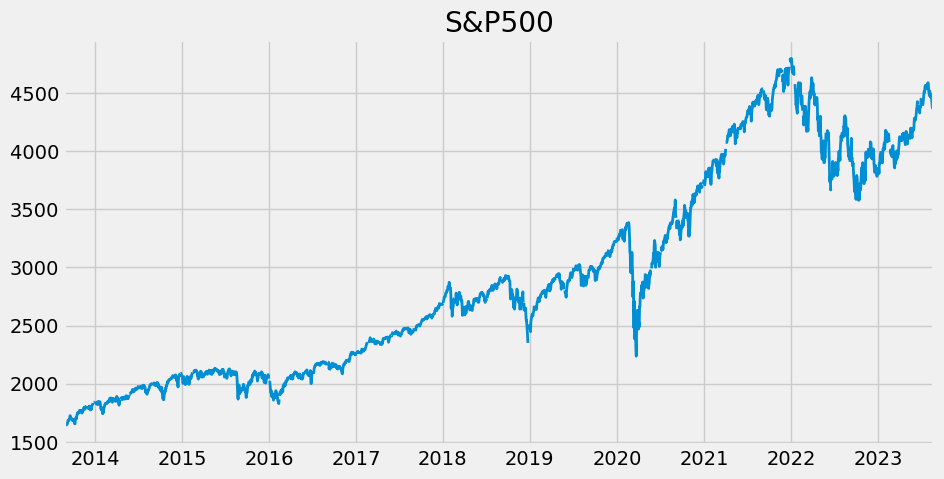

In [28]:
sp500.plot(figsize=(10,5), title = 'S&P500', lw=2)

In [29]:
# Filtering data

uemp_df = fred.search('unemployment rate state', filter= ('frequency', 'Monthly'))
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]


In [30]:
uemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-28,2023-08-28,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-28,2023-08-28,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,68,The series comes from the 'Current Population ...
CAUR,CAUR,2023-08-28,2023-08-28,Unemployment Rate in California,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-21 09:44:02-05:00,55,None
FLUR,FLUR,2023-08-28,2023-08-28,Unemployment Rate in Florida,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-21 09:44:03-05:00,53,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-08-28,2023-08-28,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,49,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000315,LNS14000315,2023-08-28,2023-08-28,Unemployment Rate - Married Women,1955-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:39-05:00,3,To obtain estimates of women worker employment...
LNS14000048,LNS14000048,2023-08-28,2023-08-28,Unemployment Rate - 25 Yrs. & over,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:40-05:00,3,The series comes from the 'Current Population ...
CWSTUR,CWSTUR,2023-08-28,2023-08-28,Unemployment Rate in West Census Region,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-21 09:43:06-05:00,2,None


In [31]:
all_results = []
for myid in uemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

print("Done")

Done


In [32]:
uemp_df_new = pd.concat(all_results, axis=1)

In [143]:
uemp_df_new

,CAUR,FLUR,TXUR,NYUR,NCUR,OHUR,ALUR,NJUR,MIUR,MAUR,ILUR,PAUR,GAUR,TNUR,COUR,SCUR,MNUR,MDUR,VAUR,IAUR,AZUR,WVUR,WIUR,ARUR,WAUR,INUR,KYUR,MOUR,NMUR,OKUR,DCUR,MTUR,AKUR,NVUR,ORUR,UTUR,LAUR,KSUR,CTUR,HIUR,NDUR,RIUR,MSUR,NEUR,NHUR,MEUR,DEUR,SDUR,WYUR,IDUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,2.6,4.0,4.1,3.5,3.8,2.3,3.5,4.1,3.5,4.4,4.2,3.1,3.4,2.8,3.2,2.8,2.7,3.2,2.8,3.5,3.4,2.5,3.0,4.5,3.1,3.8,2.5,3.5,3.0,4.8,2.3,3.7,5.5,4.4,2.4,3.6,2.9,3.9,3.5,2.1,3.1,3.5,2.1,2.4,2.6,4.4,1.9,3.7,2.6,2.7
2023-04-01,4.5,2.6,4.0,4.0,3.4,3.7,2.2,3.5,3.8,3.1,4.2,4.1,3.1,3.3,2.8,3.1,2.8,2.5,3.1,2.7,3.4,3.3,2.4,2.8,4.3,3.0,3.7,2.5,3.5,2.9,5.0,2.3,3.7,5.4,4.0,2.3,3.6,2.9,3.8,3.3,2.1,3.0,3.4,2.0,2.1,2.4,4.3,1.9,3.5,2.6,2.4
2023-05-01,4.5,2.6,4.1,3.9,3.4,3.6,2.2,3.6,3.7,2.8,4.1,4.0,3.2,3.3,2.8,3.1,2.9,2.4,2.9,2.7,3.4,3.3,2.4,2.7,4.1,3.1,3.8,2.5,3.5,2.8,5.1,2.3,3.6,5.4,3.7,2.3,3.6,2.9,3.7,3.1,2.1,3.0,3.2,1.9,1.9,2.4,4.2,1.9,3.3,2.6,2.1
2023-06-01,4.6,2.6,4.1,3.9,3.3,3.4,2.2,3.7,3.6,2.6,4.0,3.8,3.2,3.2,2.8,3.1,2.9,2.0,2.7,2.7,3.5,3.3,2.5,2.6,3.8,3.2,3.8,2.6,3.5,2.7,5.1,2.4,3.7,5.4,3.5,2.4,3.6,2.8,3.7,3.0,2.0,2.9,3.1,1.9,1.8,2.4,4.2,1.8,3.1,2.7,1.9


In [144]:
filtered_df = uemp_df_new[uemp_df_new.index.year == 2020]
filtered_df

,CAUR,FLUR,TXUR,NYUR,NCUR,OHUR,ALUR,NJUR,MIUR,MAUR,ILUR,PAUR,GAUR,TNUR,COUR,SCUR,MNUR,MDUR,VAUR,IAUR,AZUR,WVUR,WIUR,ARUR,WAUR,INUR,KYUR,MOUR,NMUR,OKUR,DCUR,MTUR,AKUR,NVUR,ORUR,UTUR,LAUR,KSUR,CTUR,HIUR,NDUR,RIUR,MSUR,NEUR,NHUR,MEUR,DEUR,SDUR,WYUR,IDUR,VTUR
2020-01-01,4.3,3.0,3.5,4.0,3.8,4.4,3.2,4.0,3.8,2.8,3.7,4.5,3.5,3.5,3.0,2.8,3.4,3.4,2.8,2.6,4.8,5.2,3.1,3.5,3.8,3.3,4.1,3.3,5.1,3.1,5.5,3.5,5.4,4.2,3.5,2.5,4.8,3.3,3.8,2.2,2.1,3.6,5.6,3.1,2.6,3.2,3.6,2.6,4.4,2.7,2.1
2020-02-01,4.4,3.0,3.6,4.1,3.8,4.6,3.3,4.1,3.8,2.8,3.8,4.7,3.6,3.5,3.2,2.9,3.5,3.5,2.9,2.6,4.8,5.3,3.0,3.6,3.8,3.4,4.1,3.4,5.3,3.2,5.7,3.5,5.4,4.4,3.6,2.5,4.7,3.3,3.9,2.2,2.2,3.7,5.8,3.0,2.6,3.2,3.7,2.5,4.7,2.8,2.2
2020-03-01,5.5,4.0,5.0,4.2,4.0,4.7,3.4,4.1,3.7,2.8,5.0,4.9,3.7,3.5,3.3,3.1,3.6,3.5,3.2,2.6,4.9,5.3,2.9,4.9,5.2,3.5,4.1,3.5,5.8,3.2,5.7,3.5,5.5,7.2,3.7,2.5,6.7,3.2,3.9,2.2,2.4,3.6,5.9,4.4,2.6,3.2,5.0,2.4,4.9,2.7,2.5
2020-04-01,16.1,13.3,12.8,15.6,14.2,16.4,13.8,14.9,22.6,16.9,18.0,16.2,12.4,15.8,11.1,11.7,8.8,9.0,12.0,10.9,13.8,15.7,14.1,10.1,16.6,16.8,16.7,11.4,9.0,12.5,11.2,11.9,11.8,30.6,13.7,10.0,13.5,12.4,8.2,22.6,8.7,18.0,15.6,8.1,16.0,9.3,13.0,8.8,5.2,11.7,14.0
2020-05-01,15.7,14.1,11.6,16.6,11.6,12.7,10.4,15.3,19.1,15.5,14.7,12.9,9.7,12.1,11.6,9.2,11.1,8.8,10.0,8.3,11.2,12.4,10.5,8.9,13.2,12.4,12.8,9.5,9.3,9.7,8.8,9.2,11.9,24.7,11.8,7.7,12.2,9.3,11.7,20.8,7.2,15.4,11.2,6.3,11.7,9.4,13.4,6.6,8.7,9.0,9.5
2020-06-01,13.8,11.8,10.1,13.5,9.7,11.0,8.6,14.4,14.4,14.4,12.7,11.3,8.4,10.1,11.2,7.8,8.6,8.1,8.9,6.7,9.7,10.5,8.7,7.9,11.3,10.3,5.3,8.0,9.0,8.2,8.6,7.6,11.4,18.8,10.2,6.4,11.0,7.5,11.4,17.5,6.4,13.3,9.4,5.2,9.6,6.6,12.8,5.3,7.4,7.5,7.8
2020-07-01,13.2,11.8,9.3,12.5,8.6,9.9,7.5,14.4,12.4,12.7,11.5,10.5,7.7,9.0,6.4,7.1,7.8,7.8,8.2,5.9,8.9,9.4,7.6,7.3,10.2,8.9,5.8,7.2,9.0,7.4,8.6,6.7,11.3,16.6,9.2,5.7,10.3,6.6,11.6,15.7,6.1,12.1,8.3,4.6,8.2,6.3,7.5,4.7,6.9,6.6,6.7
2020-08-01,11.9,8.9,8.1,10.8,7.3,8.4,6.3,13.3,9.9,10.6,9.8,9.4,6.8,7.7,6.2,6.2,6.8,7.1,7.3,5.1,8.0,8.2,6.3,6.4,8.7,7.2,5.2,6.4,8.6,6.4,8.4,5.7,7.6,13.9,8.0,4.9,9.1,5.7,9.6,13.2,5.6,10.2,7.5,3.9,6.7,4.2,7.4,4.1,6.2,5.4,5.6
2020-09-01,10.0,8.1,7.7,10.1,6.7,7.7,5.9,7.4,8.7,10.0,9.1,8.8,6.3,7.1,6.3,5.8,6.2,7.0,6.6,4.7,7.6,7.6,5.7,6.0,8.0,6.5,5.0,6.0,8.7,6.0,8.4,5.2,7.6,12.8,7.5,4.5,8.7,5.3,8.8,13.5,5.3,9.7,7.1,3.6,6.0,4.1,7.6,3.8,5.9,5.0,5.0
2020-10-01,9.3,7.1,7.1,9.2,6.0,6.9,5.3,7.1,7.5,8.7,8.2,8.2,5.5,6.4,6.2,5.3,5.5,6.7,5.8,4.4,7.0,6.9,5.1,5.5,7.2,5.6,4.8,5.4,8.4,5.5,8.1,4.7,7.3,11.2,6.9,4.1,8.0,4.8,7.9,11.5,4.9,7.0,6.9,3.3,5.2,3.8,5.2,3.4,5.6,4.4,4.5


In [145]:
unemp_states = uemp_df_new.dropna()
unemp_states

,CAUR,FLUR,TXUR,NYUR,NCUR,OHUR,ALUR,NJUR,MIUR,MAUR,ILUR,PAUR,GAUR,TNUR,COUR,SCUR,MNUR,MDUR,VAUR,IAUR,AZUR,WVUR,WIUR,ARUR,WAUR,INUR,KYUR,MOUR,NMUR,OKUR,DCUR,MTUR,AKUR,NVUR,ORUR,UTUR,LAUR,KSUR,CTUR,HIUR,NDUR,RIUR,MSUR,NEUR,NHUR,MEUR,DEUR,SDUR,WYUR,IDUR,VTUR
1976-01-01,9.2,9.7,5.8,10.3,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.0,8.4,6.0,5.8,7.4,6.0,6.4,6.1,4.3,10.2,7.5,5.8,7.3,8.5,6.6,5.6,5.9,8.6,5.8,8.7,5.8,7.1,9.2,9.5,5.8,6.3,4.2,9.8,9.8,3.4,7.8,6.7,3.3,6.5,8.7,8.0,3.3,4.1,5.6,8.6
1976-02-01,9.2,9.7,5.8,10.3,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.1,8.4,6.0,5.7,7.4,6.0,6.4,6.1,4.3,10.2,7.5,5.8,7.3,8.5,6.6,5.6,5.9,8.7,5.8,8.7,5.8,7.1,9.2,9.5,5.9,6.3,4.2,9.8,9.8,3.4,7.8,6.7,3.3,6.5,8.7,8.0,3.3,4.1,5.6,8.6
1976-03-01,9.1,9.6,5.9,10.2,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.1,8.4,6.0,5.7,7.3,5.9,6.4,6.1,4.3,10.1,7.5,5.7,7.3,8.4,6.5,5.6,5.9,8.7,5.8,8.6,5.8,7.0,9.2,9.4,5.8,6.3,4.2,9.8,9.8,3.4,7.7,6.6,3.3,6.5,8.6,8.0,3.2,4.1,5.6,8.6
1976-04-01,9.1,9.5,5.9,10.2,6.3,8.0,6.5,10.3,9.8,10.3,6.6,8.1,8.3,6.0,5.6,7.2,5.8,6.4,6.0,4.2,10.0,7.5,5.6,7.2,8.5,6.3,5.6,6.0,8.6,5.8,8.5,5.8,6.9,9.0,9.2,5.8,6.4,4.2,9.6,9.7,3.5,7.7,6.4,3.2,6.5,8.6,8.1,3.1,4.0,5.6,8.6
1976-05-01,9.0,9.3,5.9,10.1,6.1,7.8,6.4,10.3,9.6,10.1,6.6,8.1,8.1,5.9,5.6,7.0,5.7,6.5,5.9,4.1,9.8,7.4,5.5,7.1,8.5,6.0,5.5,6.0,8.6,5.7,8.4,5.8,6.9,8.9,9.1,5.7,6.5,4.2,9.4,9.4,3.6,7.7,6.3,3.1,6.5,8.5,8.3,3.1,3.9,5.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,2.6,4.0,4.1,3.5,3.8,2.3,3.5,4.1,3.5,4.4,4.2,3.1,3.4,2.8,3.2,2.8,2.7,3.2,2.8,3.5,3.4,2.5,3.0,4.5,3.1,3.8,2.5,3.5,3.0,4.8,2.3,3.7,5.5,4.4,2.4,3.6,2.9,3.9,3.5,2.1,3.1,3.5,2.1,2.4,2.6,4.4,1.9,3.7,2.6,2.7
2023-04-01,4.5,2.6,4.0,4.0,3.4,3.7,2.2,3.5,3.8,3.1,4.2,4.1,3.1,3.3,2.8,3.1,2.8,2.5,3.1,2.7,3.4,3.3,2.4,2.8,4.3,3.0,3.7,2.5,3.5,2.9,5.0,2.3,3.7,5.4,4.0,2.3,3.6,2.9,3.8,3.3,2.1,3.0,3.4,2.0,2.1,2.4,4.3,1.9,3.5,2.6,2.4
2023-05-01,4.5,2.6,4.1,3.9,3.4,3.6,2.2,3.6,3.7,2.8,4.1,4.0,3.2,3.3,2.8,3.1,2.9,2.4,2.9,2.7,3.4,3.3,2.4,2.7,4.1,3.1,3.8,2.5,3.5,2.8,5.1,2.3,3.6,5.4,3.7,2.3,3.6,2.9,3.7,3.1,2.1,3.0,3.2,1.9,1.9,2.4,4.2,1.9,3.3,2.6,2.1
2023-06-01,4.6,2.6,4.1,3.9,3.3,3.4,2.2,3.7,3.6,2.6,4.0,3.8,3.2,3.2,2.8,3.1,2.9,2.0,2.7,2.7,3.5,3.3,2.5,2.6,3.8,3.2,3.8,2.6,3.5,2.7,5.1,2.4,3.7,5.4,3.5,2.4,3.6,2.8,3.7,3.0,2.0,2.9,3.1,1.9,1.8,2.4,4.2,1.8,3.1,2.7,1.9


In [146]:
id_to_state = uemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
[c for c in unemp_states.columns]

[' California',
 ' Florida',
 ' Texas',
 ' New York',
 ' North Carolina',
 ' Ohio',
 ' Alabama',
 ' New Jersey',
 ' Michigan',
 ' Massachusetts',
 ' Illinois',
 ' Pennsylvania',
 ' Georgia',
 ' Tennessee',
 ' Colorado',
 ' South Carolina',
 ' Minnesota',
 ' Maryland',
 ' Virginia',
 ' Iowa',
 ' Arizona',
 ' West Virginia',
 ' Wisconsin',
 ' Arkansas',
 ' Washington',
 ' Indiana',
 ' Kentucky',
 ' Missouri',
 ' New Mexico',
 ' Oklahoma',
 ' the District of Columbia',
 ' Montana',
 ' Alaska',
 ' Nevada',
 ' Oregon',
 ' Utah',
 ' Louisiana',
 ' Kansas',
 ' Connecticut',
 ' Hawaii',
 ' North Dakota',
 ' Rhode Island',
 ' Mississippi',
 ' Nebraska',
 ' New Hampshire',
 ' Maine',
 ' Delaware',
 ' South Dakota',
 ' Wyoming',
 ' Idaho',
 ' Vermont']

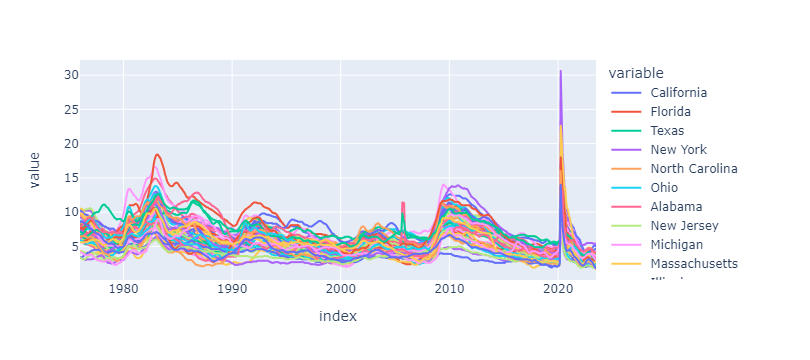

In [147]:
# Plot states Unemployment rate
px.line(unemp_states)

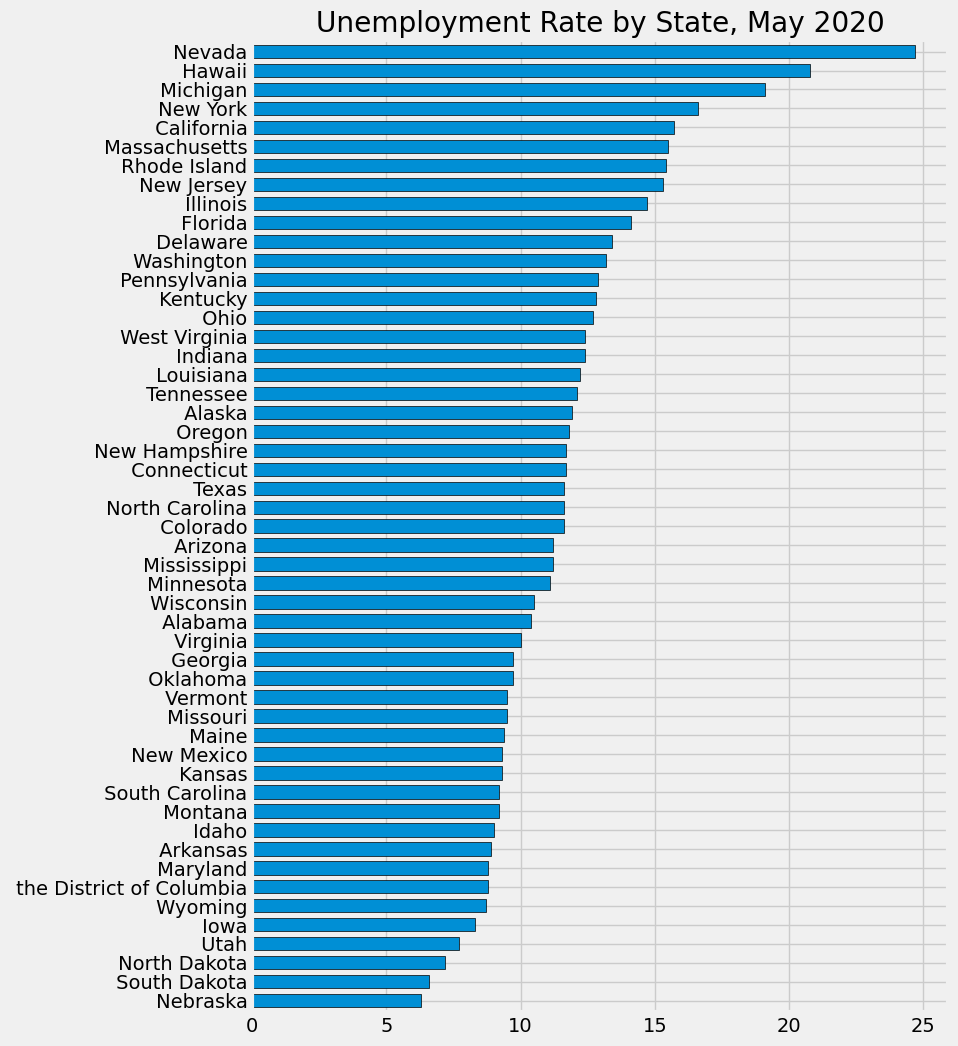

In [148]:
plot_test = unemp_states[unemp_states.index == '2020-05-01'].T \
.sort_values('2020-05-01') \
.plot(kind='barh', figsize=(8,12), width =0.7, edgecolor='black', title= 'Unemployment Rate by State, May 2020')

plot_test.legend().remove()
plt.show()


In [149]:
# Pull Participation Rate
part_df = fred.search('participation rate state', filter= ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Rate for')]

In [50]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA01,LBSSA01,2023-08-28,2023-08-28,Labor Force Participation Rate for Alabama,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:07-05:00,8,A state's labor-force participation rate is th...
LBSSA06,LBSSA06,2023-08-28,2023-08-28,Labor Force Participation Rate for California,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:02-05:00,12,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2023-08-28,2023-08-28,Labor Force Participation Rate for Kentucky,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:03-05:00,20,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2023-08-28,2023-08-28,Labor Force Participation Rate for Florida,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:02-05:00,18,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2023-08-28,2023-08-28,Labor Force Participation Rate for Wisconsin,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:02-05:00,17,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2023-08-28,2023-08-28,Labor Force Participation Rate for Minnesota,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:02-05:00,16,A state's labor-force participation rate is th...
LBSSA42,LBSSA42,2023-08-28,2023-08-28,Labor Force Participation Rate for Pennsylvania,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:04-05:00,16,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2023-08-28,2023-08-28,Labor Force Participation Rate for Michigan,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:03-05:00,14,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2023-08-28,2023-08-28,Labor Force Participation Rate for New York,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-18 09:01:04-05:00,13,A state's labor-force participation rate is th...


In [51]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()

In [84]:
part_id_to_state

{'LBSSA01': ' Alabama',
 'LBSSA06': ' California',
 'LBSSA21': ' Kentucky',
 'LBSSA12': ' Florida',
 'LBSSA55': ' Wisconsin',
 'LBSSA27': ' Minnesota',
 'LBSSA42': ' Pennsylvania',
 'LBSSA26': ' Michigan',
 'LBSSA36': ' New York',
 'LBSSA19': ' Iowa',
 'LBSSA28': ' Mississippi',
 'LBSSA51': ' Virginia',
 'LBSSA47': ' Tennessee',
 'LBSSA39': ' Ohio',
 'LBSSA35': ' New Mexico',
 'LBSSA48': ' Texas',
 'LBSSA24': ' Maryland',
 'LBSSA54': ' West Virginia',
 'LBSSA23': ' Maine',
 'LBSSA37': ' North Carolina',
 'LBSSA13': ' Georgia',
 'LBSSA04': ' Arizona',
 'LBSSA49': ' Utah',
 'LBSSA17': ' Illinois',
 'LBSSA25': ' Massachusetts',
 'LBSSA08': ' Colorado',
 'LBSSA33': ' New Hampshire',
 'LBSSA02': ' Alaska',
 'LBSSA22': ' Louisiana',
 'LBSSA18': ' Indiana',
 'LBSSA40': ' Oklahoma',
 'LBSSA41': ' Oregon',
 'LBSSA05': ' Arkansas',
 'LBSSA29': ' Missouri',
 'LBSSA53': ' Washington',
 'LBSSA31': ' Nebraska',
 'LBSSA34': ' New Jersey',
 'LBSSA45': ' South Carolina',
 'LBSSA09': ' Connecticut',
 'L

In [85]:
all_results = []
for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    part_states = pd.concat(all_results, axis=1)
print("Done")

Done


In [86]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [87]:
part_states

,Alabama,California,Kentucky,Florida,Wisconsin,Minnesota,Pennsylvania,Michigan,New York,Iowa,Mississippi,Virginia,Tennessee,Ohio,New Mexico,Texas,Maryland,West Virginia,Maine,North Carolina,Georgia,Arizona,Utah,Illinois,Massachusetts,Colorado,New Hampshire,Alaska,Louisiana,Indiana,Oklahoma,Oregon,Arkansas,Missouri,Washington,Nebraska,New Jersey,South Carolina,Connecticut,Idaho,Montana,South Dakota,Kansas,Nevada,Vermont,North Dakota,Delaware,Rhode Island,Wyoming,Hawaii,District Of Columbia
1976-01-01,57.0,62.6,60.5,55.8,65.6,65.6,58.4,61.6,58.0,64.4,58.8,65.9,59.6,61.7,60.8,63.8,64.3,52.5,62.1,66.5,63.7,59.5,62.8,63.0,64.8,67.2,65.9,69.0,56.8,64.0,59.3,62.9,57.9,60.5,60.9,64.9,61.5,65.3,64.2,63.0,62.7,64.6,65.1,71.3,63.6,62.6,62.7,63.8,65.3,69.9,64.4
1976-02-01,56.9,62.4,60.3,55.7,65.5,65.5,58.3,61.5,58.0,64.3,58.6,65.8,59.4,61.7,60.5,63.5,64.2,52.4,61.9,66.3,63.6,59.2,62.6,63.0,64.7,67.0,65.6,68.4,56.6,63.9,59.2,62.7,57.8,60.3,60.7,64.9,61.4,65.2,64.1,62.8,62.5,64.4,65.0,70.8,63.4,62.4,62.5,63.7,64.9,69.6,64.5
1976-03-01,56.8,62.2,60.2,55.5,65.4,65.4,58.3,61.5,58.0,64.2,58.5,65.6,59.3,61.7,60.3,63.4,64.1,52.3,61.9,66.2,63.5,59.1,62.5,62.9,64.6,66.8,65.6,67.8,56.5,63.8,59.1,62.5,57.7,60.3,60.6,64.8,61.4,65.0,64.0,62.7,62.4,64.4,64.9,70.5,63.2,62.3,62.5,63.6,64.7,69.6,64.5
1976-04-01,56.8,62.2,60.1,55.5,65.4,65.4,58.3,61.6,58.0,64.1,58.5,65.5,59.3,61.6,60.3,63.5,64.1,52.3,61.8,66.2,63.5,59.1,62.5,62.9,64.6,66.6,65.7,67.9,56.4,63.8,59.0,62.4,57.7,60.4,60.6,64.8,61.5,64.9,64.1,62.7,62.3,64.3,65.0,70.4,63.5,62.5,62.4,63.7,64.9,69.4,64.5
1976-05-01,56.8,62.3,60.1,55.4,65.5,65.5,58.3,61.7,58.1,64.1,58.5,65.4,59.4,61.6,60.3,63.6,64.1,52.2,61.7,66.3,63.6,59.1,62.6,63.0,64.6,66.5,66.0,67.9,56.4,63.9,59.0,62.5,57.7,60.6,60.7,64.8,61.6,64.7,64.3,62.8,62.2,64.3,65.1,70.5,63.6,62.6,62.4,63.6,65.2,69.3,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,56.7,62.3,57.5,59.3,64.6,68.0,62.0,59.9,60.7,68.2,54.4,65.9,59.0,61.5,56.7,63.9,64.9,54.6,58.0,60.4,61.1,61.6,68.9,64.7,65.0,68.5,65.8,65.3,59.3,63.5,61.0,62.7,57.4,62.9,64.6,69.5,64.8,56.1,64.5,62.6,62.6,67.5,66.6,61.4,63.7,69.3,59.7,62.9,64.3,60.4,70.6
2023-04-01,56.8,62.4,57.6,59.3,64.8,68.1,62.0,60.2,60.8,68.3,54.5,66.2,59.1,61.8,56.8,64.1,65.1,54.6,58.1,60.5,61.2,61.6,69.1,64.8,64.8,68.6,65.6,65.3,59.5,63.6,61.1,62.4,57.5,63.2,64.7,69.5,65.0,56.3,64.3,62.5,62.7,67.7,66.7,61.4,63.7,69.6,59.8,62.9,64.5,60.4,70.6
2023-05-01,56.9,62.5,57.7,59.4,65.1,68.2,62.0,60.5,61.0,68.5,54.6,66.5,59.2,62.1,56.9,64.2,65.3,54.6,58.3,60.6,61.3,61.7,69.4,64.7,64.7,68.7,65.3,65.3,59.6,63.6,61.3,62.2,57.5,63.4,64.8,69.5,65.2,56.5,64.2,62.5,62.8,67.8,66.8,61.5,63.7,69.7,59.9,63.1,64.6,60.4,70.8
2023-06-01,57.0,62.5,57.8,59.5,65.3,68.4,62.0,60.7,61.2,68.7,54.5,66.6,59.3,62.2,57.0,64.2,65.3,54.6,58.4,60.7,61.3,61.7,69.6,64.6,64.6,68.7,65.2,65.3,59.5,63.6,61.4,62.0,57.6,63.6,64.7,69.5,65.4,56.7,64.1,62.5,62.8,67.9,66.8,61.5,63.8,69.7,60.0,63.2,64.6,60.4,70.8


In [88]:
unemp_states

,California,Florida,Texas,New York,North Carolina,Ohio,Alabama,New Jersey,Michigan,Massachusetts,Illinois,Pennsylvania,Georgia,Tennessee,Colorado,South Carolina,Minnesota,Maryland,Virginia,Iowa,Arizona,West Virginia,Wisconsin,Arkansas,Washington,Indiana,Kentucky,Missouri,New Mexico,Oklahoma,the District of Columbia,Montana,Alaska,Nevada,Oregon,Utah,Louisiana,Kansas,Connecticut,Hawaii,North Dakota,Rhode Island,Mississippi,Nebraska,New Hampshire,Maine,Delaware,South Dakota,Wyoming,Idaho,Vermont
1976-01-01,9.2,9.7,5.8,10.3,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.0,8.4,6.0,5.8,7.4,6.0,6.4,6.1,4.3,10.2,7.5,5.8,7.3,8.5,6.6,5.6,5.9,8.6,5.8,8.7,5.8,7.1,9.2,9.5,5.8,6.3,4.2,9.8,9.8,3.4,7.8,6.7,3.3,6.5,8.7,8.0,3.3,4.1,5.6,8.6
1976-02-01,9.2,9.7,5.8,10.3,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.1,8.4,6.0,5.7,7.4,6.0,6.4,6.1,4.3,10.2,7.5,5.8,7.3,8.5,6.6,5.6,5.9,8.7,5.8,8.7,5.8,7.1,9.2,9.5,5.9,6.3,4.2,9.8,9.8,3.4,7.8,6.7,3.3,6.5,8.7,8.0,3.3,4.1,5.6,8.6
1976-03-01,9.1,9.6,5.9,10.2,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.1,8.4,6.0,5.7,7.3,5.9,6.4,6.1,4.3,10.1,7.5,5.7,7.3,8.4,6.5,5.6,5.9,8.7,5.8,8.6,5.8,7.0,9.2,9.4,5.8,6.3,4.2,9.8,9.8,3.4,7.7,6.6,3.3,6.5,8.6,8.0,3.2,4.1,5.6,8.6
1976-04-01,9.1,9.5,5.9,10.2,6.3,8.0,6.5,10.3,9.8,10.3,6.6,8.1,8.3,6.0,5.6,7.2,5.8,6.4,6.0,4.2,10.0,7.5,5.6,7.2,8.5,6.3,5.6,6.0,8.6,5.8,8.5,5.8,6.9,9.0,9.2,5.8,6.4,4.2,9.6,9.7,3.5,7.7,6.4,3.2,6.5,8.6,8.1,3.1,4.0,5.6,8.6
1976-05-01,9.0,9.3,5.9,10.1,6.1,7.8,6.4,10.3,9.6,10.1,6.6,8.1,8.1,5.9,5.6,7.0,5.7,6.5,5.9,4.1,9.8,7.4,5.5,7.1,8.5,6.0,5.5,6.0,8.6,5.7,8.4,5.8,6.9,8.9,9.1,5.7,6.5,4.2,9.4,9.4,3.6,7.7,6.3,3.1,6.5,8.5,8.3,3.1,3.9,5.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,2.6,4.0,4.1,3.5,3.8,2.3,3.5,4.1,3.5,4.4,4.2,3.1,3.4,2.8,3.2,2.8,2.7,3.2,2.8,3.5,3.4,2.5,3.0,4.5,3.1,3.8,2.5,3.5,3.0,4.8,2.3,3.7,5.5,4.4,2.4,3.6,2.9,3.9,3.5,2.1,3.1,3.5,2.1,2.4,2.6,4.4,1.9,3.7,2.6,2.7
2023-04-01,4.5,2.6,4.0,4.0,3.4,3.7,2.2,3.5,3.8,3.1,4.2,4.1,3.1,3.3,2.8,3.1,2.8,2.5,3.1,2.7,3.4,3.3,2.4,2.8,4.3,3.0,3.7,2.5,3.5,2.9,5.0,2.3,3.7,5.4,4.0,2.3,3.6,2.9,3.8,3.3,2.1,3.0,3.4,2.0,2.1,2.4,4.3,1.9,3.5,2.6,2.4
2023-05-01,4.5,2.6,4.1,3.9,3.4,3.6,2.2,3.6,3.7,2.8,4.1,4.0,3.2,3.3,2.8,3.1,2.9,2.4,2.9,2.7,3.4,3.3,2.4,2.7,4.1,3.1,3.8,2.5,3.5,2.8,5.1,2.3,3.6,5.4,3.7,2.3,3.6,2.9,3.7,3.1,2.1,3.0,3.2,1.9,1.9,2.4,4.2,1.9,3.3,2.6,2.1
2023-06-01,4.6,2.6,4.1,3.9,3.3,3.4,2.2,3.7,3.6,2.6,4.0,3.8,3.2,3.2,2.8,3.1,2.9,2.0,2.7,2.7,3.5,3.3,2.5,2.6,3.8,3.2,3.8,2.6,3.5,2.7,5.1,2.4,3.7,5.4,3.5,2.4,3.6,2.8,3.7,3.0,2.0,2.9,3.1,1.9,1.8,2.4,4.2,1.8,3.1,2.7,1.9


In [89]:
unemp_states.query('index >= 2020 and index < 2022')[' New York']

2020-01-01     4.0
2020-02-01     4.1
2020-03-01     4.2
2020-04-01    15.6
2020-05-01    16.6
2020-06-01    13.5
2020-07-01    12.5
2020-08-01    10.8
2020-09-01    10.1
2020-10-01     9.2
2020-11-01     8.9
2020-12-01     8.7
2021-01-01     8.5
2021-02-01     8.3
2021-03-01     8.0
2021-04-01     7.8
2021-05-01     7.4
2021-06-01     7.4
2021-07-01     7.0
2021-08-01     6.7
2021-09-01     6.2
2021-10-01     5.9
2021-11-01     5.6
2021-12-01     5.4
Name:  New York, dtype: float64

In [113]:
#Fix DC

unemp_states = unemp_states.rename(columns={' the District of Columbia' : ' District Of Columbia'})
unemp_states.columns

Index([' California', ' Florida', ' Texas', ' New York', ' North Carolina',
       ' Ohio', ' Alabama', ' New Jersey', ' Michigan', ' Massachusetts',
       ' Illinois', ' Pennsylvania', ' Georgia', ' Tennessee', ' Colorado',
       ' South Carolina', ' Minnesota', ' Maryland', ' Virginia', ' Iowa',
       ' Arizona', ' West Virginia', ' Wisconsin', ' Arkansas', ' Washington',
       ' Indiana', ' Kentucky', ' Missouri', ' New Mexico', ' Oklahoma',
       ' District Of Columbia', ' Montana', ' Alaska', ' Nevada', ' Oregon',
       ' Utah', ' Louisiana', ' Kansas', ' Connecticut', ' Hawaii',
       ' North Dakota', ' Rhode Island', ' Mississippi', ' Nebraska',
       ' New Hampshire', ' Maine', ' Delaware', ' South Dakota', ' Wyoming',
       ' Idaho', ' Vermont'],
      dtype='object')

In [93]:
part_states.columns

Index([' Alabama', ' California', ' Kentucky', ' Florida', ' Wisconsin',
       ' Minnesota', ' Pennsylvania', ' Michigan', ' New York', ' Iowa',
       ' Mississippi', ' Virginia', ' Tennessee', ' Ohio', ' New Mexico',
       ' Texas', ' Maryland', ' West Virginia', ' Maine', ' North Carolina',
       ' Georgia', ' Arizona', ' Utah', ' Illinois', ' Massachusetts',
       ' Colorado', ' New Hampshire', ' Alaska', ' Louisiana', ' Indiana',
       ' Oklahoma', ' Oregon', ' Arkansas', ' Missouri', ' Washington',
       ' Nebraska', ' New Jersey', ' South Carolina', ' Connecticut', ' Idaho',
       ' Montana', ' South Dakota', ' Kansas', ' Nevada', ' Vermont',
       ' North Dakota', ' Delaware', ' Rhode Island', ' Wyoming', ' Hawaii',
       ' District Of Columbia'],
      dtype='object')

In [94]:
# Get the column names of both DataFrames
unemp_columns = set(unemp_states.columns)
part_columns = set(part_states.columns)

# Find columns that match between both DataFrames
matching_columns = unemp_columns.intersection(part_columns)

# Find columns that are different between both DataFrames
different_columns_in_unemp = unemp_columns.difference(part_columns)
different_columns_in_part = part_columns.difference(unemp_columns)

# Print the results
print("Matching Columns:")
print(matching_columns)
print("\nColumns Different in unemp_states:")
print(different_columns_in_unemp)
print("\nColumns Different in part_states:")
print(different_columns_in_part)


Matching Columns:
{' Rhode Island', ' North Carolina', ' South Carolina', ' North Dakota', ' Georgia', ' Texas', ' South Dakota', ' Missouri', ' Iowa', ' Nebraska', ' Michigan', ' Washington', ' Indiana', ' Vermont', ' Oklahoma', ' Idaho', ' Minnesota', ' Connecticut', ' Louisiana', ' Florida', ' Colorado', ' Mississippi', ' Alabama', ' Kansas', ' Kentucky', ' Pennsylvania', ' Montana', ' New Hampshire', ' Virginia', ' Delaware', ' New York', ' Illinois', ' California', ' Hawaii', ' New Mexico', ' Maryland', ' Wisconsin', ' Utah', ' Arizona', ' West Virginia', ' Oregon', ' Wyoming', ' Tennessee', ' Ohio', ' Massachusetts', ' Maine', ' New Jersey', ' Nevada', ' Alaska', ' Arkansas'}

Columns Different in unemp_states:
{' the District of Columbia'}

Columns Different in part_states:
{' District Of Columbia'}


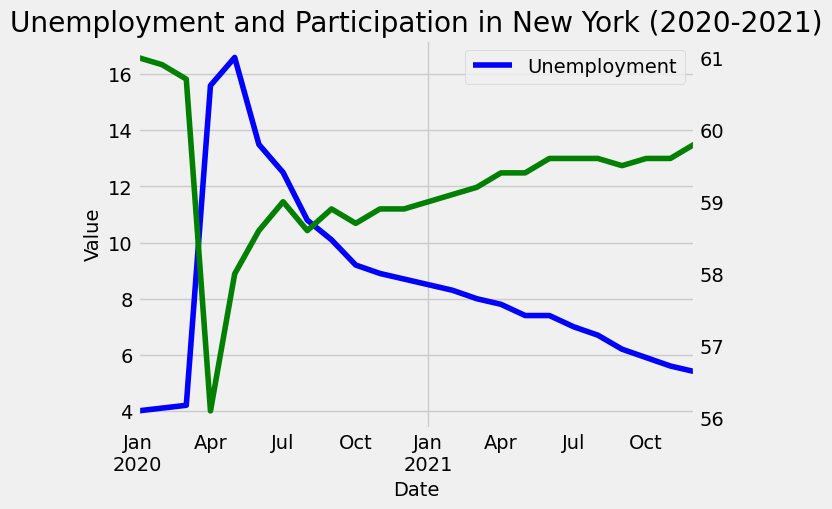

In [139]:
# Sample data (replace with your data)
data = {'Unemployment': unemp_states.query('index >= 2020 and index < 2022')[' New York'],
        'Participation': part_states.query('index >= 2020 and index < 2022')[' New York']}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots()
ax2 = ax.twinx()

# Plot "Unemployment" and "Participation" on the same axis
df['Unemployment'].plot(ax=ax, label='Unemployment', color='blue')
df['Participation'].plot(ax=ax2, label='Participation', color='green')

# Add labels, title, legend, etc.
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Unemployment and Participation in New York (2020-2021)')
ax.legend()
ax2.grid(False)

# Show the plot
df_fig = plt.show()
df_fig